# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [37]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [38]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [39]:
#  1. Get the total rides for each city type
rides_total = pyber_data_df.groupby(["type"]).count()["ride_id"]
#rides_total

In [40]:
# 2. Get the total drivers for each city type
drivers_total = city_data_df.groupby(["type"]).sum()["driver_count"]
#drivers_total

In [41]:
#  3. Get the total amount of fares for each city type
fare_total = pyber_data_df.groupby(["type"]).sum()["fare"]
#fare_total

In [42]:
#  4. Get the average fare per ride for each city type. 
fare_average = fare_total / rides_total
#fare_average

In [43]:
# 5. Get the average fare per driver for each city type. 
fare_driver_average = fare_total / drivers_total
#fare_driver_average

In [44]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": rides_total, "Total Drivers": drivers_total, "Total Fares": fare_total, "Average Fare per Ride": fare_average, "Average Fare per Driver": fare_driver_average})

#pyber_summary_df

In [45]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [46]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [47]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [48]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_fare_df = pyber_data_df.groupby(['type', 'date']).sum()['fare']

#type_date_fare_df

In [49]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
type_date_fare_df = type_date_fare_df.reset_index()
#type_date_fare_df

In [50]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
type_date_fare_pivot = type_date_fare_df.pivot(index="date", columns="type", values="fare")
#type_date_fare_pivot

In [51]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
filtered_dates_df = type_date_fare_pivot.loc['2019-01-01' : '2019-04-29']
#filtered_dates_df

In [52]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
filtered_dates_df.index = pd.to_datetime(filtered_dates_df.index)

In [53]:
# 7. Check that the datatype for the index is datetime using df.info()
filtered_dates_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [54]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
weekly_fares_df = filtered_dates_df.resample('W').sum()
#weekly_fares_df

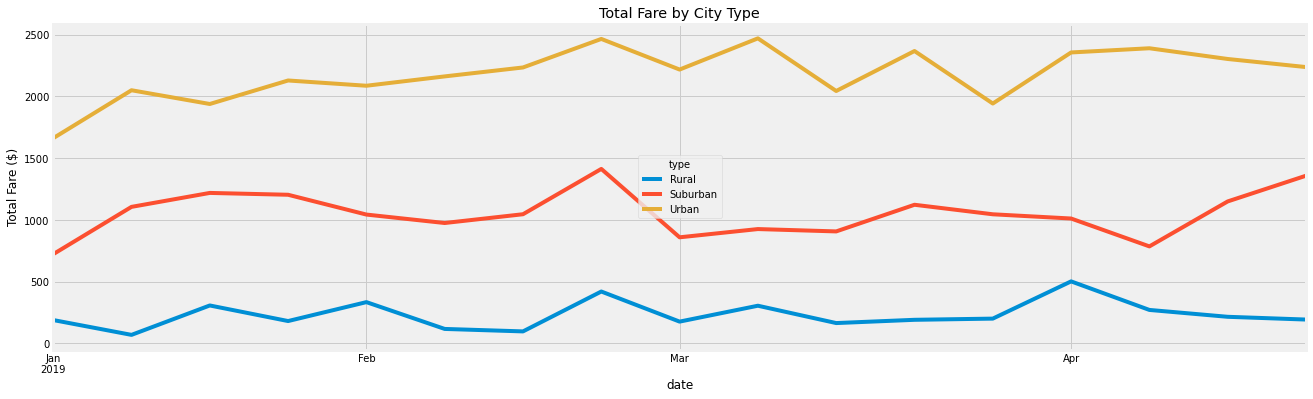

In [55]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
weekly_plot = weekly_fares_df.plot(figsize = (20,6))
weekly_plot.set_title("Total Fare by City Type")
weekly_plot.set_ylabel("Total Fare ($)")

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# Save the plot
# Adapted code to save figure from:  https://stackoverflow.com/questions/19555525/saving-plots-axessubplot-generated-from-python-pandas-with-matplotlibs-savefi
fig = plt.gcf()
fig.savefig('analysis/PyBer_fare_summary.png')